<a href="https://colab.research.google.com/github/yuvarajrajdata/Malarial_cell_classification_using_Tensorflow/blob/main/task_1_imp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile


zip_path = '/content/drive/My Drive/Colab Notebooks/Parasitized.zip'
extract_path = '/content/Parasitized_images/'

import os
os.makedirs(extract_path, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)


Extracted files: ['Parasitized']


In [ ]:
zip_path = '/content/drive/My Drive/Colab Notebooks/Uninfected.zip'

extract_path = '/content/Uninfected_images/'


import os
os.makedirs(extract_path, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)

Extracted files: ['Uninfected']


In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [ ]:
import numpy as np
np.random.seed(1000)

import cv2
import os
from PIL import Image
import keras

os.environ['KERAS_BACKEND'] = 'tensorflow'



In [ ]:
image_directory = '/content/Malaria Cells'
SIZE = 64
dataset=[]
label = []



parasitized_images = os.listdir(image_directory + '/Parasitized')

for i, image_name in enumerate(parasitized_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + '/Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)  # 0 for Parasitized

Uninfected_images = os.listdir(image_directory + '/Uninfected')

for i, image_name in enumerate(Uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + '/Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)  # 1 for Uninfected



In [ ]:
INPUT_SHAPE = (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

In [ ]:
conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',padding = 'same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(0.2)(norm1)

conv2 = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',padding = 'same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(0.2)(norm2)

flat = keras.layers.Flatten()(drop2)

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)

hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(1, activation='sigmoid')(drop4)

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496 

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

label = np.array(label)

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)



# Training the model
history = model.fit(
    np.array(X_train),
    y_train,
    batch_size=64,
    verbose=1,
    epochs=10,  #  epochs
    validation_split=0.1,  # 10% of the training data for validation
    shuffle=True
)


test_accuracy = model.evaluate(np.array(X_test), y_test)[1] * 100
print("Test_Accuracy: {:.2f}%".format(test_accuracy))


Epoch 1/10
311/311 [==============================] - 20s 17ms/step - loss: 0.4989 - accuracy: 0.7693 - val_loss: 0.9467 - val_accuracy: 0.7891
Epoch 2/10
311/311 [==============================] - 4s 14ms/step - loss: 0.2241 - accuracy: 0.9143 - val_loss: 0.2088 - val_accuracy: 0.9315
Epoch 3/10
311/311 [==============================] - 5s 16ms/step - loss: 0.1920 - accuracy: 0.9284 - val_loss: 0.4787 - val_accuracy: 0.8426
Epoch 4/10
311/311 [==============================] - 5s 15ms/step - loss: 0.1681 - accuracy: 0.9388 - val_loss: 0.1946 - val_accuracy: 0.9288
Epoch 5/10
311/311 [==============================] - 4s 14ms/step - loss: 0.1549 - accuracy: 0.9429 - val_loss: 0.2016 - val_accuracy: 0.9383
Epoch 6/10
311/311 [==============================] - 5s 15ms/step - loss: 0.1358 - accuracy: 0.9487 - val_loss: 0.2252 - val_accuracy: 0.9261
Epoch 7/10
311/311 [==============================] - 5s 15ms/step - loss: 0.1240 - accuracy: 0.9553 - val_loss: 0.1973 - val_accuracy: 0.936

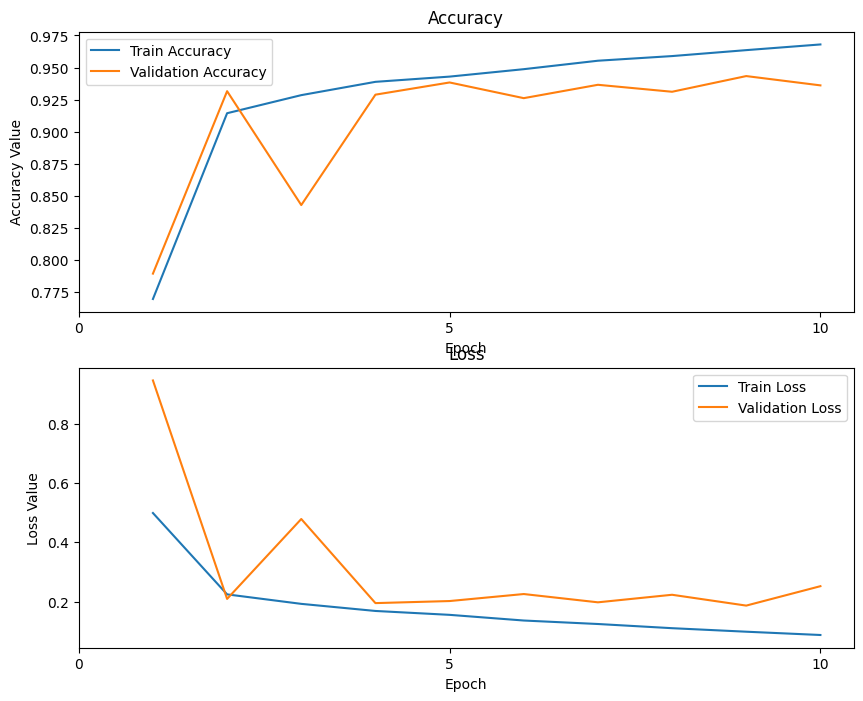

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot accuracy
max_epoch = len(history.history['accuracy']) + 1
epoch_list = list(range(1, max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

# Plot loss
ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# Show the plot
plt.show()


In [ ]:
model.save('/model_cnn.h5')

In [ ]:
from keras.models import load_model



model = load_model('/content/C:/Users/user/Desktop/task/task 1/Malaria Cells/model_cnn.h5')


new_image_path = '/content/Malaria Cells/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_21.png'
SIZE = 64


new_image = cv2.imread(new_image_path)
new_image = Image.fromarray(new_image, 'RGB')
new_image = new_image.resize((SIZE, SIZE))
new_image = np.array(new_image)


new_image = new_image.astype('float32') / 255.0
new_image = np.expand_dims(new_image, axis=0)

predictions = model.predict(new_image)


if predictions[0] < 0.5:
    print("Parasitized")
else:
    print("Uninfected")


1/1 [==============================] - 1s 525ms/step
Uninfected
